In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fact/1022.txt   
  inflating: dataset/fact/1023.txt   
  inflating: dataset/fact/1024.txt   
  inflating: dataset/fact/1025.txt   
  inflating: dataset/fact/1026.txt   
  inflating: dataset/fact/1027.txt   
  inflating: dataset/fact/1028.txt   
  inflating: dataset/fact/1029.txt   
  inflating: dataset/fact/103.txt    
  inflating: dataset/fact/1030.txt   
  inflating: dataset/fact/1031.txt   
  inflating: dataset/fact/1032.txt   
  inflating: dataset/fact/1033.txt   
  inflating: dataset/fact/1034.txt   
  inflating: dataset/fact/1035.txt   
  inflating: dataset/fact/1036.txt   
  inflating: dataset/fact/1037.txt   
  inflating: dataset/fact/1038.txt   
  inflating: dataset/fact/1039.txt   
  inflating: dataset/fact/104.txt    
  inflating: dataset/fact/1040.txt   
  inflating: dataset/fact/1041.txt   
  inflating: dataset/fact/1042.txt   
  inflating: dataset/fact/1043.txt   
  inflating: dataset/fact/1044.txt   

In [ ]:
import csv
import glob
import pandas as pd
import os

In [ ]:
dirpath = "./dataset"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,news,label
0,یکی از موارد ابتلا به کرونا خود ماسکه! بدن احت...,fake
1,جالب بهداشت جهانی و بقیه کشورها دارند همه چیز ...,fake
2,من دوروز بعد زدن واکسن مبتلا شدم و پنج روز درگ...,fake
3,فقط و فقط به خاطر فشار و درخواست مردم برای این...,fake
4,ارسال کمک های ارسالی به ایران به کشورهای سوریه...,fake
...,...,...
5021,دُز یادآور واکسن کرونا برای نوجوانان و کودکان ...,fact
5022,بهبود زیرساخت‌های گردشگری لازمه توسعه گردشگری ...,fact
5023,سندروم حاد تنفسی جدید یعنی کرونا ویروس-دو ، ای...,fact
5024,محققان آمریکایی برای اولین بار موفق به کشف سطو...,fact


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['news'].isnull()], '\n')
df.dropna(inplace=True)

missing values stats
news     2
label    0
dtype: int64 

some missing values
     news label
3395  NaN  fact
4390  NaN  fact 



In [ ]:
!pip install hazm

In [ ]:
import hazm
import re

In [ ]:
normalizer = hazm.Normalizer()
stopwords = hazm.stopwords_list
tokenizer = hazm.word_tokenize

def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)
    # removing wierd patterns
    tokens = tokenizer(text)
    filtered = list(set(tokens) - set(stopwords()))
    # Define a pattern to match punctuation characters (including Arabic and Persian punctuation)
    punctuation_pattern = list('،.؛؟!"#$%&\'()*+/:;<=>?@[\\]^_`{|}~')
    # Remove punctuation from the tokens
    filtered = list(set(filtered) - set(punctuation_pattern))
    # Join the filtered tokens back into a single string
    text = ' '.join(filtered)
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text



In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,محروم هوای احتیاج ماسکه کرونا .. داره بدن اکسی...,fake
1,کشورها لغو جهانی ایران بهداشت خبره بقیه می‌شه ...,fake
2,رومن درگیر نمیدونم داغون دوروز واکسن شدم روز ب...,fake
3,بزنن میشه استرازنکا ایمنی هست خبرهای دارن درخو...,fake
4,ارسال سوریه ارسالی ایران کشورهای عراق کمک‌های,fake
...,...,...
5021,ضروری کرونا دز نوجوانان کودکان واکسن سالم یادآور,fact
5022,گردشگری لازمه پسا کرونا بهبود زیرساخت‌های توسعه,fact
5023,۱۹ مزمن آورده‌اند حاضر درمعرض ایمنی جسمانی عوا...,fact
5024,آمریکایی » سوپریور آب موفق ساحلی قابل‌تشخیص کر...,fact


In [ ]:


from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [ ]:
counter = counter_word(df.news)

In [ ]:
counter.most_common(5)

[('کرونا', 1765), ('واکسن', 1406), ('۱۹', 838), ('ویروس', 664), ('کووید', 599)]

In [ ]:
num_unique_words = len(counter)

In [ ]:
labels = list(sorted(df['label'].unique()))
labels

['fact', 'fake']

In [ ]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
df

,news,label,label_id
0,محروم هوای احتیاج ماسکه کرونا .. داره بدن اکسی...,fake,1
1,کشورها لغو جهانی ایران بهداشت خبره بقیه می‌شه ...,fake,1
2,رومن درگیر نمیدونم داغون دوروز واکسن شدم روز ب...,fake,1
3,بزنن میشه استرازنکا ایمنی هست خبرهای دارن درخو...,fake,1
4,ارسال سوریه ارسالی ایران کشورهای عراق کمک‌های,fake,1
...,...,...,...
5021,ضروری کرونا دز نوجوانان کودکان واکسن سالم یادآور,fact,0
5022,گردشگری لازمه پسا کرونا بهبود زیرساخت‌های توسعه,fact,0
5023,۱۹ مزمن آورده‌اند حاضر درمعرض ایمنی جسمانی عوا...,fact,0
5024,آمریکایی » سوپریور آب موفق ساحلی قابل‌تشخیص کر...,fact,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])


train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

train_sentences, train_labels = np.asarray(train['news'].values.tolist()), np.asarray(train['label_id'].values.tolist())
val_sentences, val_labels = np.asarray(valid['news'].values.tolist()), np.asarray(valid['label_id'].values.tolist())
test_sentences, test_labels = np.asarray(test['news'].values.tolist()), np.asarray(test['label_id'].values.tolist())

In [ ]:
train_sentences.shape, val_sentences.shape , test_sentences.shape , df.news.shape

((3617,), (402,), (1005,), (5024,))

In [ ]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape , test_padded.shape

((3617, 20), (402, 20), (1005, 20))

In [ ]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])


In [ ]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [ ]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[4, 3, 2, 379, 59, 8, 146]
۱۹ کووید واکسن بالاتر احتمال تزریق فوت


In [ ]:


# Create GRU model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.GRU(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            377568    
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 396,449
Trainable params: 396,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
model.fit(train_padded, train_labels, epochs=2, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/2
114/114 - 2s - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.5411 - val_accuracy: 0.8831 - 2s/epoch - 20ms/step
Epoch 2/2
114/114 - 3s - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.8245 - val_accuracy: 0.8632 - 3s/epoch - 29ms/step


In [ ]:
model.evaluate(test_padded, test_labels, verbose=2)

32/32 - 0s - loss: 0.6174 - accuracy: 0.8955 - 128ms/epoch - 4ms/step


[0.617426872253418, 0.89552241563797]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [ ]:
predictions = model.predict(test_padded)
ypred = [1 if p > 0.5 else 0 for p in predictions]

print()
print(classification_report(test_labels, ypred, target_names=labels))
print()

print(f'F1: {f1_score(test_labels, ypred, average="weighted")}')

32/32 [==============================] - 0s 5ms/step

              precision    recall  f1-score   support

        fact       0.88      0.91      0.90       502
        fake       0.91      0.88      0.89       503

    accuracy                           0.90      1005
   macro avg       0.90      0.90      0.90      1005
weighted avg       0.90      0.90      0.90      1005


F1: 0.8954870000158314


<Axes: >

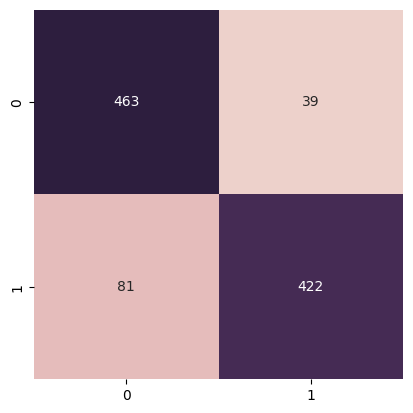

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(test_labels, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
model.save('/content/gdrive/MyDrive/GRU-model')

In [ ]:
new_model = keras.models.load_model("/content/gdrive/MyDrive/GRU-model")

In [ ]:
test_string = 'اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی'
print(test_string)
test_string = cleaning(test_string)
type(test_string)


اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی


str

In [ ]:
from collections import Counter

# Count unique words
def counter_word1(text):
    count = Counter()
    for word in text.split():
      count[word] += 1
    return count
counter1 = counter_word1(test_string)
num_unique_words1 = len(counter1)
num_unique_words1
test_string = [test_string]
test_string

['واکسن ایرانی وحشتناک تزریق مخرب اثرات']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer1 = Tokenizer(num_words=num_unique_words1)
tokenizer1.fit_on_texts(np.asarray(list(test_string)))

In [ ]:
word_index1 = tokenizer1.word_index
word_index1

{'واکسن': 1, 'ایرانی': 2, 'وحشتناک': 3, 'تزریق': 4, 'مخرب': 5, 'اثرات': 6}

In [ ]:
train_sequences1 = tokenizer1.texts_to_sequences(test_string)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length1 = 20

train_padded1 = pad_sequences(train_sequences1, maxlen=max_length1, padding="post", truncating="post")
train_padded1

array([[1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [ ]:
predictions = new_model.predict(train_padded1)
predictions = [1 if p > 0.5 else 0 for p in predictions]
print(predictions)

1/1 [==============================] - 0s 387ms/step
[0]
